# Practice Pytorch - NN

In [23]:
import torch

def activation(x):
    return 1 / (1 + torch.exp(-x))

torch.manual_seed(7)

# random normal variable of size 1,5
features = torch.randn((1,5))
print("features : ",features , features.shape)

# weights -> random normal variable with the shape of features
weights = torch.randn_like(features)
print("weights : ",weights, weights.shape)

bias = torch.randn(1, 1)
print("bias : ",bias, bias.shape)

features :  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]) torch.Size([1, 5])
weights :  tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]]) torch.Size([1, 5])
bias :  tensor([[0.3177]]) torch.Size([1, 1])


To flip weights we can use: 
    - reshape
    - resize  -> if asked a shape which has more or less elements, it will cut off
    - view * it is preferred!!

In [22]:
mm = torch.mm(features, weights.view(5, 1))
print("weights : ",mm, mm.shape)

mm1 = torch.mm(features, weights.reshape(5, 1))
print("weights : ",mm1, mm1.shape)

#_in place operation
mm2 = torch.mm(features, weights.resize_(5, 1))
print("weights : ",mm2, mm2.shape)

weights :  tensor([[-0.0242]]) torch.Size([1, 1])
weights :  tensor([[-0.0242]]) torch.Size([1, 1])
weights :  tensor([[-0.0242]]) torch.Size([1, 1])


In [25]:
output  = activation(mm + bias)
output 

tensor([[0.5729]])

### converting torch to numpy & vv -> .numpy(), .from_numpy

these are oinplace conversions, changing one will change another!!!

In [29]:
import numpy as np

npvar = np.array([1, 2, 3])
npvar

array([1, 2, 3])

In [31]:
btor = torch.from_numpy(npvar)
btor

tensor([1, 2, 3], dtype=torch.int32)

In [33]:
npvar2 = btor.numpy()
npvar2

array([1, 2, 3])

In [40]:
btor.mul_(2)

tensor([2, 4, 6], dtype=torch.int32)

In [44]:
npvar

array([2, 4, 6])

In [42]:
npvar2

array([2, 4, 6])

# Pytorch - Neural Networks - MNIST

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Make your plots higher resolution

import torch
import numpy as np
import matplotlib.pyplot as plt
import helper


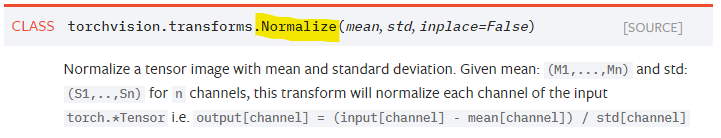

https://pytorch.org/docs/stable/torchvision/transforms.html

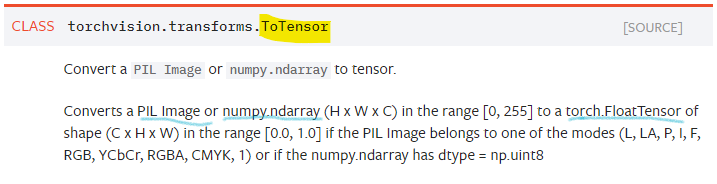

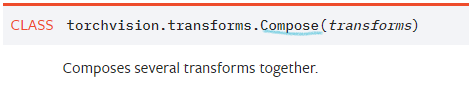 

**DataLoader**  - Combines a dataset and a sampler, and provides an iterable over the given dataset.
https://pytorch.org/docs/stable/data.html?highlight=dataloader#module-torch.utils.data 

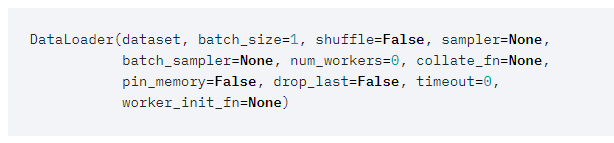


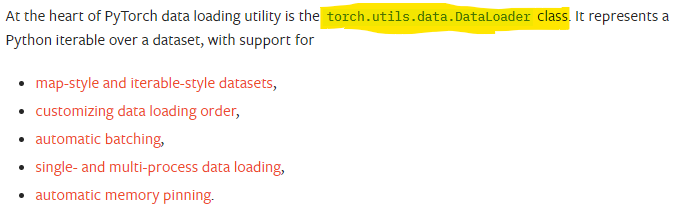

The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. 

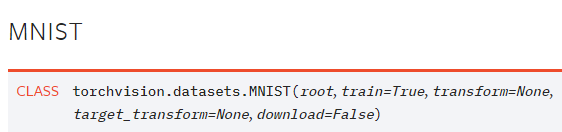

In [13]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),])
print(transform)

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', train=True, download=True, transform =transform)

# Dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)


In [20]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


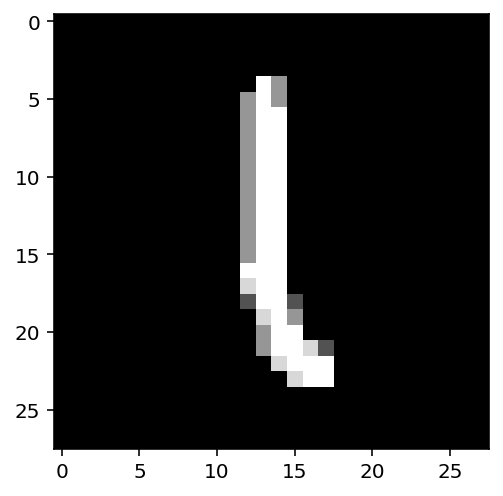

In [15]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [28]:
import torch

def activation(x):
    return 1 / (1 + torch.exp(-x))

# initialization
torch.manual_seed(7)

n_input = images.shape[2] * images.shape[3] # 784
n_hidden = 256
n_output = 10

w1 = torch.randn(n_input, n_hidden)  # 784 x 256
b1 = torch.randn(n_hidden)           #256

w2 = torch.randn(n_hidden, n_output) # 256 x 10
b2 = torch.randn(n_output)           #10

# flatten the input 28 x 28 to vector for all 64 images in a batch
inputs = images.view(images.shape[0], -1)
print("inputs : ",inputs.shape)                 # 64 x 784

h = activation(torch.mm(inputs, w1) + b1)
print("hidden : ",h.shape)   

out = torch.mm(h, w2) + b2
print("output : ",out.shape)   

inputs :  torch.Size([64, 784])
hidden :  torch.Size([64, 256])
output :  torch.Size([64, 10])


In [29]:
print(out)

tensor([[-8.1611e+00, -6.6149e+00, -2.4155e+00, -5.8415e+00, -6.6755e+00,
          6.8908e-01, -1.1670e+01, -8.2019e+00,  1.2003e+00,  6.8222e+00],
        [-6.4676e+00, -1.3445e+01,  4.9161e+00,  9.8253e-01, -6.8007e+00,
          1.5328e+00, -1.7018e+01, -2.4618e+00,  6.2587e-01,  1.8842e+00],
        [ 3.5222e+00, -1.4335e+00, -8.0008e+00, -1.1590e+00, -8.4004e+00,
          4.8453e+00, -1.4267e+00, -5.7248e+00, -5.3532e+00, -1.3988e+01],
        [ 7.7283e+00, -1.8040e+01,  8.8882e+00, -3.6698e+00,  4.2698e+00,
          1.1891e+01, -9.3884e+00, -1.6138e+01,  7.5593e-01, -8.0650e+00],
        [-1.0190e+01, -8.3957e+00, -1.7209e+00,  2.0720e+00, -1.1061e+00,
          4.6184e+00,  3.6410e+00, -1.2868e+01,  1.9768e+00, -1.5570e+01],
        [-7.0552e-01, -5.9007e+00, -4.0994e+00,  3.3434e+00, -7.2285e+00,
          1.1592e+01, -1.0756e+00, -1.5904e+01,  4.9462e+00, -1.5259e+01],
        [ 3.7751e+00, -3.1294e+00,  3.1776e-01,  5.5261e+00, -3.3189e+00,
          1.0839e+01, -1.8803e+0

In [40]:
# def softmax(x):
x = out;
ex = torch.exp(x)  # 64 x 10
print(ex.shape)
ex_sum = torch.sum(ex, 1).view(-1,1) # 64 x 1
print(ex_sum.shape)

sm = ex / ex_sum

def softmax(x):
    ## TODO: Implement the softmax function here
    ex = torch.exp(x)  # 64 x 10
    ex_sum = torch.sum(ex, 1).view(-1,1) # 64 x 1
    return ex / ex_sum

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
torch.Size([64, 1])
torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Pytorch neural network - nn module 

torch.nn.Module is the base class for all NN code. The models that we develop should subclass this and call **Super()** in the "__init__" method to gain access to all members of the parent class. Our model that subclasses nn.Module must implement init and "forward" methods

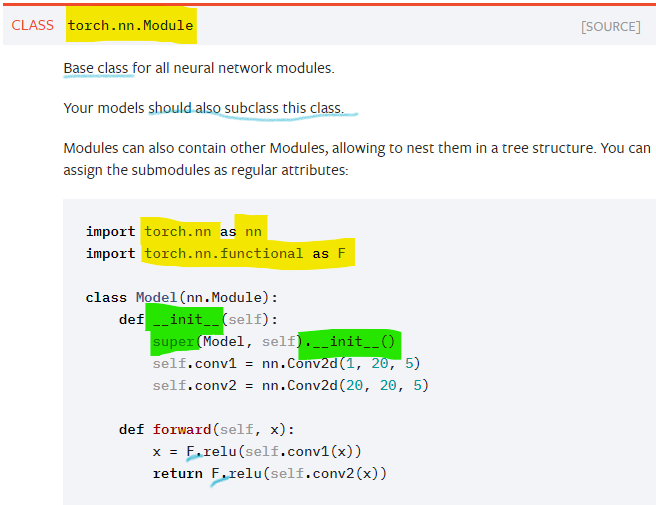


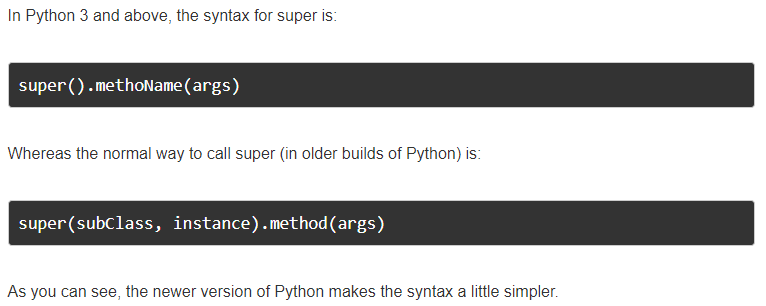

self.hidden = nn.Linear(784, 256)

This line creates a module for a linear transformation,  𝑥𝐖+𝑏 , with 784 inputs and 256 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.





In [45]:
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        n_input = 784
        n_hidden = 256
        n_output = 10
        
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


In [49]:
        
modelObj = Network()
modelObj

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [50]:
class NetworkF(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        n_input = 784
        n_hidden = 256
        n_output = 10
        
        self.hidden = nn.Linear(n_input, n_hidden)
        self.output = nn.Linear(n_hidden, n_output)
        
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        return x


In [55]:
modelObjF = NetworkF()
modelObjF

NetworkF(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

### MyNetwork

In [60]:
class Networkfc(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        n_input = 784
        n_fc1 = 128
        n_fc2 = 64
        n_fc3 = 10
        
        self.fc1 = nn.Linear(n_input, n_fc1)  # hidden layer 1 - 784 x 128
        self.fc2 = nn.Linear(n_fc1, n_fc2)    # hidden layer 2 - 128 x 64
        self.fc3 = nn.Linear(n_fc2, n_fc3)    # output layer - 64 x 10
        
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)        
        return x

model = Networkfc()
model

Networkfc(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [63]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0135, -0.0189,  0.0264,  ..., -0.0275, -0.0074,  0.0186],
        [ 0.0260, -0.0062, -0.0092,  ..., -0.0114,  0.0024, -0.0274],
        [ 0.0263,  0.0102, -0.0123,  ..., -0.0342, -0.0060, -0.0061],
        ...,
        [ 0.0257, -0.0125, -0.0062,  ...,  0.0111,  0.0157,  0.0323],
        [ 0.0092, -0.0037,  0.0202,  ..., -0.0205,  0.0199,  0.0288],
        [-0.0263, -0.0147, -0.0030,  ...,  0.0174,  0.0284,  0.0111]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0201, -0.0235, -0.0192, -0.0294, -0.0248, -0.0128, -0.0172,  0.0280,
        -0.0083,  0.0208, -0.0018, -0.0263,  0.0325,  0.0022, -0.0088,  0.0185,
        -0.0128, -0.0230,  0.0347, -0.0161, -0.0216,  0.0003, -0.0090, -0.0139,
        -0.0236, -0.0241, -0.0183, -0.0115, -0.0121,  0.0310, -0.0080, -0.0055,
        -0.0334, -0.0289,  0.0162, -0.0218,  0.0245, -0.0314, -0.0345, -0.0088,
        -0.0143,  0.0131,  0.0211, -0.0326,  0.0208,  0.0180, -0.0190,  0.0292,
         0.0289

### Forward pass - images

Before training the network , pass and image and see that the probabilities are pretty much the same. Model has no idea about the digits

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 784])
torch.Size([1, 784])


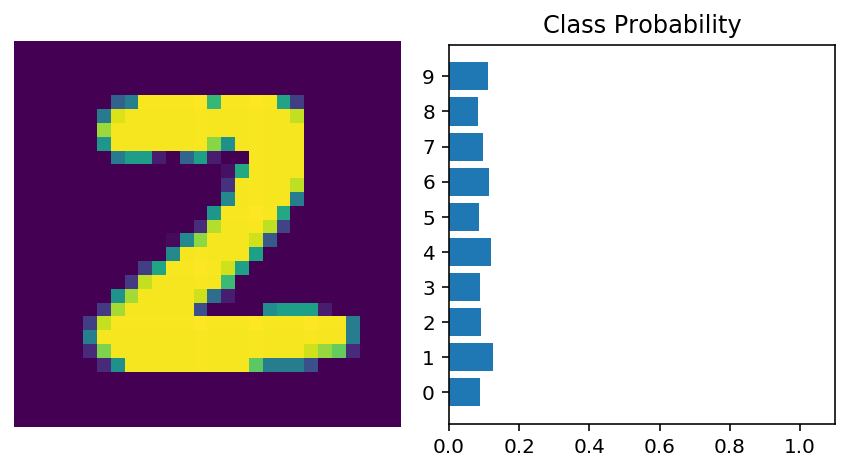

In [77]:
dataiter2 = iter(trainloader)
images, labels = dataiter2.next()
print(images.shape)

# convert to 1D vector
# inplace -> resize_
rez = images.resize_(64, 1, 784)
print(rez.shape)

# do the forward pass
img_idx = 0
img1 = images[img_idx,:]
print(img1.shape)

# get probabilities
ps = model.forward(img1)


helper.view_classify(img1.view(1, 28, 28), ps)